<a href="https://colab.research.google.com/github/svetajamkina/PYTHON/blob/main/Visualiztion22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Understandin the data

In [ ]:
import pandas as pd


In [ ]:
advertising=pd.read_csv('/content/tvmarketing.csv')
#Tv -advertising budget spent on TV marketing
# Sales -how much we have sold (revenue)

In [ ]:
advertising.head()# firsy 5 rows

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [ ]:
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


##Regression plot

In [ ]:
import seaborn as sns

<Axes: xlabel='TV', ylabel='Sales'>

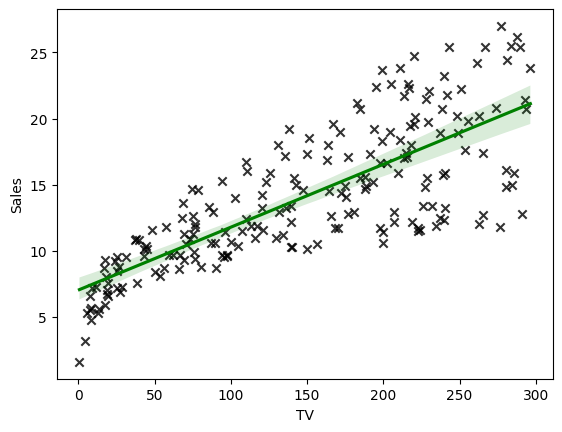

In [ ]:
    sns.regplot(
    data=advertising,
    x='TV',
    y="Sales",
    ci=99,
    marker="x",
    color="black",
    line_kws=dict(color="green"))

In [ ]:
#Pearson correlation koefficient
advertising.corr() #calculate corr for whole dataframe

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


In [ ]:
advertising['TV'].corr(advertising['Sales']) # positive, strong

0.7822244248616061

In [ ]:
###Supervised vs unsupervised


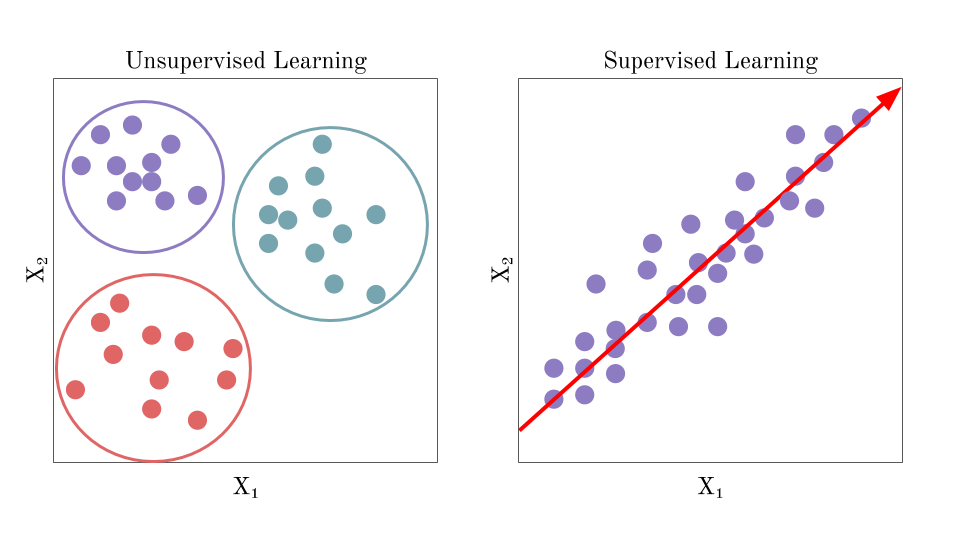

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
# Preparing X and Y
X= advertising.drop('Sales', axis=1) #independent variable
X.head()


,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [ ]:
Y=advertising.drop('TV', axis=1)
Y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


#Train/Tests set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7)
X_train

,TV
107,90.4
22,13.2
1,44.5
199,232.1
138,43.0
...,...
111,241.7
2,17.2
48,227.2
153,171.3


##Train the model

In [ ]:
from sklearn.linear_model import LinearRegression #Import the model

In [ ]:
model = LinearRegression() #Initialize the model

In [ ]:
model.fit(X_train, y_train) #Fit the model

LinearRegression()

In [ ]:
### Y = mX + b
print(f'Model intercept is {model.intercept_}')
print(f'Model coefficient is {model.coef_}')

Model intercept is [6.94942768]
Model coefficient is [[0.04564836]]


##A prediction

In [ ]:

my_new_budget = [[50]] #2D array dataset

my_predicted_sales = model.predict(my_new_budget)

print(f'When the new budget is {my_new_budget[0][0]}, then predicted sales are {round(my_predicted_sales[0][0])}.')

When the new budget is 50, then predicted sales are 9.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
X_test.head()

,TV
95,163.3
99,135.2
194,149.7
63,102.7
17,281.4


In [ ]:
y_pred = model.predict(X_test)


In [ ]:
final_df = pd.DataFrame()
final_df['TV'] = X_test
final_df['Actual_sales'] = y_test
final_df['Predicted_sales'] = y_pred
final_df.head()

,TV,Actual_sales,Predicted_sales
95,163.3,16.9,14.403804
99,135.2,17.2,13.121085
194,149.7,17.3,13.782987
63,102.7,14.0,11.637514
17,281.4,24.4,19.794875


In [ ]:
final_df['ABS_Error_Actual_vs_Predicted'] = abs(final_df['Actual_sales']-final_df['Predicted_sales'])

In [ ]:
final_df.reset_index(inplace=True)

In [ ]:
final_df.head()

,index,TV,Actual_sales,Predicted_sales,ABS_Error_Actual_vs_Predicted
0,95,163.3,16.9,14.403804,2.496196
1,99,135.2,17.2,13.121085,4.078915
2,194,149.7,17.3,13.782987,3.517013
3,63,102.7,14.0,11.637514,2.362486
4,17,281.4,24.4,19.794875,4.605125


#Visualize the results

In [ ]:
#Visualize the results

import matplotlib.pyplot as plt

final_df.reset_index(inplace=True) # we create a new index for the current dataframe that starts with 0 and goes to the end of the dataframe

plt.plot(final_df.index, final_df.ABS_Error_Actual_vs_Predicted)
plt.title('Actual vs predicted absolute values')
plt.xlabel('Index')
plt.ylabel('predicted absolute values')
plt.axhline(final_df['ABS_Error_Actual_vs_Predicted'].mean(), linestyle='dashed', color='red')


ValueError: cannot insert level_0, already exists

#MEAN ABSOLUTE ERROR

https://colab.research.google.com/drive/1yQRSLWnBsRD73_2JMtdI96dDHHTsZD4P#scrollTo=RK-eflXPP1TR&line=1&uniqifier=1

In [ ]:
# Mean Absolute error

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

In [ ]:
print(f'Mean ABS error is:{mae}') #avrage distance between real and predicted data

Mean ABS error is:2.7853562255916136


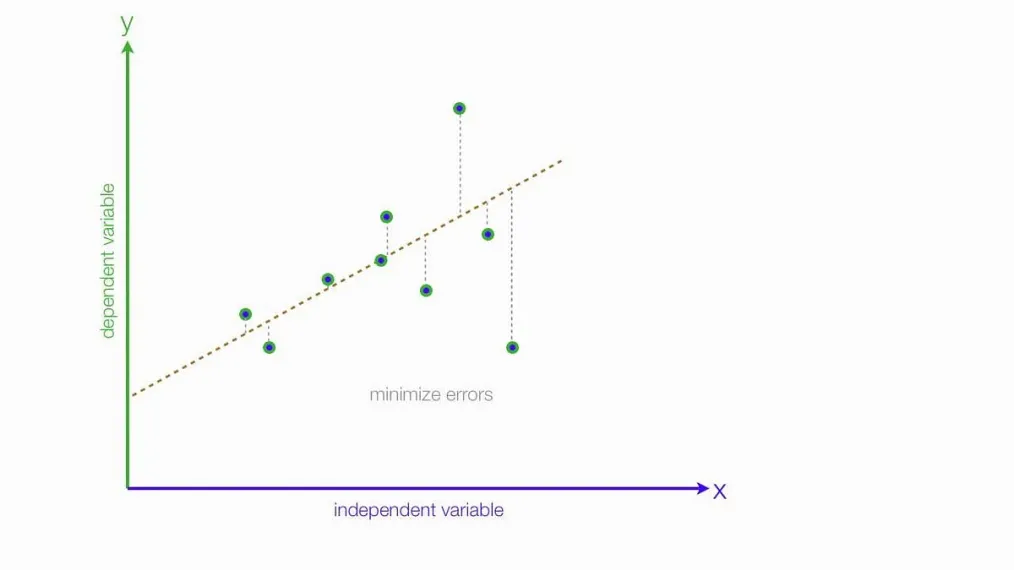



```
# This is formatted as code
```



In [ ]:
# R2 and MSE
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE is: {mse}')
print(f'r2 is : {r2}')

MSE is: 11.493596067533698
r2 is : 0.5839085850367258
